#  Decision Tree Classifier :

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

## loading dataset

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Forming the iris  dataframe

In [10]:
x=pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Split data set in 75:25 ratio

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)
print(xtrain, ytrain)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                 5.9               3.0                4.2               1.5
92                 5.8               2.6                4.0               1.2
112                6.8               3.0                5.5               2.1
2                  4.7               3.2                1.3               0.2
141                6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[112 rows x 4 columns] [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2

# Feature scaling to normalize independent variables

In [15]:
from sklearn.preprocessing import StandardScaler

std_x = StandardScaler()
xtrain = std_x.fit_transform(xtrain)
xtest = std_x.transform(xtest)
xtrain

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.55797625e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.98410911e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12707506e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31530348e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38416753e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -8.01118523e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31530348e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.86933568e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41436341e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.64126001e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.55797625e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

# Fitting Decision tree to training dataset

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy', random_state=0)

# Visualise after fitting training data

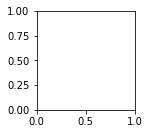

In [38]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    X1 = iris.data[:, pair]
    y = iris.target

plt.subplot(2, 3, pairidx + 1)

# Scatter Plot

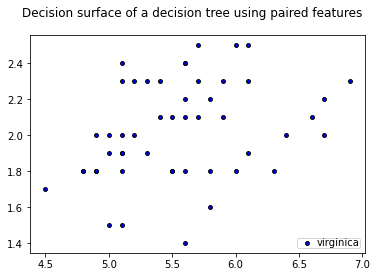

<Figure size 432x288 with 0 Axes>

In [39]:
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    
plt.scatter(X1[idx, 0], X1[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

plt.show()

# PlotTree

[Text(133.92000000000002, 195.696, 'X[3] <= -0.544\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 0.549\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 0.111\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 0.677\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(234.36, 65.232, 'X[3] <= 0.549\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsa

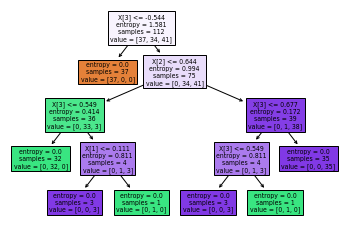

In [41]:
tree.plot_tree(classifier, filled=True)

# Predict test model

In [42]:
y_pred=classifier.predict(xtest)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])